Improvements 


1.   Add in Class weights to handle Imbalance 
2.   Increase Units in Dense layers and Also Increase Number of Layers 
3.   Add BatchNormalization to Layers 
4.   Add Dropout after Layers 



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
# Check if Data has any null values 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check for Object datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [8]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [9]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [10]:
# ----------- Add class weights when Data is Imbalanced -----------------------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [11]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [12]:
# Add in Class weights to handle Imbalance 
# Increase Units in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [13]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [14]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20 , class_weight=model_class_weights)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.6314 - accuracy: 0.6960 - val_loss: 0.5471 - val_accuracy: 0.7175
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.7131 - val_loss: 0.5131 - val_accuracy: 0.7300
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7191 - val_loss: 0.4805 - val_accuracy: 0.7635
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.7377 - val_loss: 0.5012 - val_accuracy: 0.7430
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7489 - val_loss: 0.5170 - val_accuracy: 0.7380
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.7490 - val_loss: 0.4289 - val_accuracy: 0.8110
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.7514 - val_loss: 0.4598 - val_accuracy: 0.7790
Epoch 

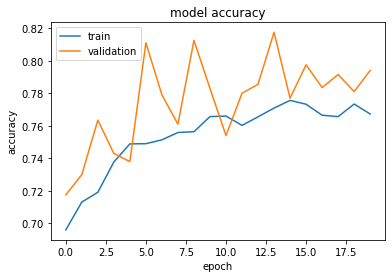

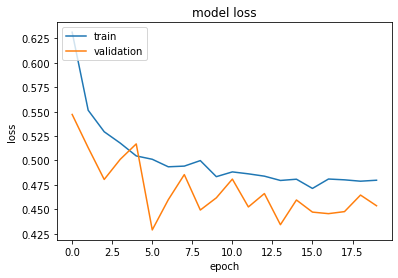

In [15]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see graphs converging better compared to previous implementation

In [16]:
# collect predictions 
predictions = np.round(model.predict(Xtest))

In [17]:
# Check Accuracy
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(Ytest , predictions) # Accuracy is good

0.794

In [18]:
# We don't see the problem of predicting everything as class 0
confusion_matrix(Ytest , predictions)

array([[1279,  325],
       [  87,  309]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report 
print(classification_report(Ytest , predictions))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1604
           1       0.49      0.78      0.60       396

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000

